# Linear Regression - by hand

knowledge refresh on Linear regression 1/2

In [142]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10.0,7.0)

#reading Data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [188]:
X=data['Head Size(cm^3)']
Y=data['Brain Weight(grams)']

0      4512
1      3738
2      4261
3      3777
4      4177
       ... 
232    3214
233    3394
234    3233
235    3352
236    3391
Name: Head Size(cm^3), Length: 237, dtype: int64
0      1530
1      1297
2      1335
3      1282
4      1590
       ... 
232    1110
233    1215
234    1104
235    1170
236    1120
Name: Brain Weight(grams), Length: 237, dtype: int64


_m_ is the number of samples

The regression line equation is 
$ y = b _{1} x + b _{0} $

The slope of the line is 
$ b _{1} =\frac {\sum \limits _{j=1} ^m ( x - \overline{x}) . ( y - \overline{y}) }{ \sum \limits _{j=1} ^m ( x - \overline{x}) ^2} $

In [225]:
# Total number of samples
m=len(X)

numer=0
denom=0

result=np.array([],dtype=np.int64).reshape(0,5)
for iteration in range(m):
    if (iteration==0):
        mean_x = 0.1
        mean_y = 0.1
    else:
        mean_x = np.mean(X[:iteration])
        mean_y = np.mean(Y[:iteration])
    numer+= (X[iteration]-mean_x)*(Y[iteration]-mean_y)
    denom+= (X[iteration]-mean_x) ** 2
    b1 = numer / denom
    b0 = mean_y - (b1 * mean_x)
    result=np.concatenate((result,[[b0, b1, iteration,mean_x, mean_y]]),axis=0)

print ("Regression Line equation : y = "+str(result[0,1])+"x + "+str(result[0,0]))

Regression Line equation : y = 0.33908109665551106x + 0.0660918903344489


In [196]:
ss_t=0
ss_r=0
for i in range(m):
    y_pred= b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 -(ss_r/ss_t)
print("R2: "+str(r2))

R2: 0.6315584210535841


In [215]:
b_0=[i[0] for i in result]
b_1=[i[1] for i in result] 

<IPython.core.display.Javascript object>


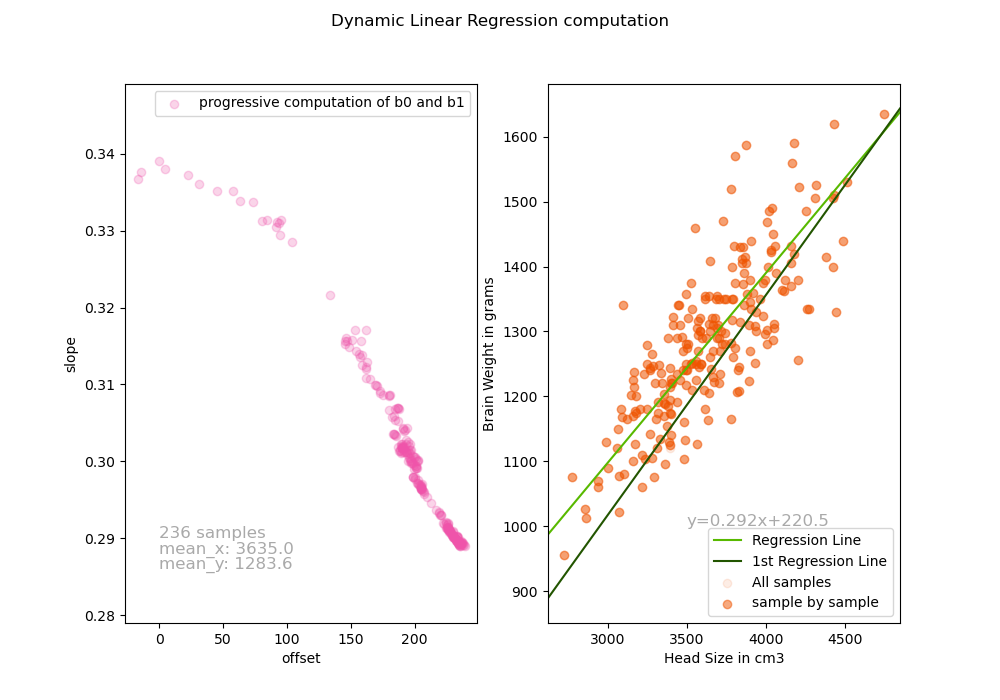

In [228]:
import matplotlib.animation as animation

font = {'family': 'sansserif',
        'color':  'darkgrey',
        'weight': 'normal',
        'size': 12,
        }

data1 = np.array(result)
data2 = data[['Head Size(cm^3)','Brain Weight(grams)']].to_numpy()

max_x = np.max(X)+100
min_x = np.min(X)-100

max_b_0 = np.max(b_0)+10
min_b_0 = np.min(b_0)-10
max_b_1 = np.max(b_1)+0.01
min_b_1 = np.min(b_1)-0.01

x = np.linspace(min_x, max_x, 1000)

fig, (ax1, ax2) = plt.subplots(1, 2)

line, = ax2.plot([],[],color='#58b900',label='Regression Line')
line0, = ax2.plot(x,x * result[0][1] + result[0][0],color='#225500',label='1st Regression Line')
ax2.scatter(X,Y,c='#ef5400',label='All samples', alpha=0.1)
scat2=ax2.scatter([],[],c='#ef5400',label='sample by sample', alpha=0.5)
text2 = ax2.text(3500, 1000, 'y=ax+b', fontdict=font)

scat1 = ax1.scatter([],[],c='#ef54aa',label='progressive computation of b0 and b1', alpha=0.25)
text1a = ax1.text(0, 0.29, 'iteration #', fontdict=font)
text1b = ax1.text(0, 0.288, 'mean_x: ', fontdict=font)
text1c = ax1.text(0, 0.286, 'mean_y: ', fontdict=font)

fig.suptitle('Dynamic Linear Regression computation')

ax1.set_xlim(min_b_0, max_b_0)
ax1.set_ylim(min_b_1, max_b_1)
ax1.set_xlabel('offset')
ax1.set_ylabel('slope')
ax1.legend()

ax2.set_xlim(min_x, max_x)
ax2.set_xlabel('Head Size in cm3')
ax2.set_ylabel('Brain Weight in grams')
ax2.legend()

def animate(current_frame): 
    my_b1 = result[current_frame][1]
    my_b0 = result[current_frame][0]
    y = x * my_b1 + my_b0
    line.set_data(x, y)
    mydata2 = data2[:current_frame]
    scat2.set_offsets(mydata2)
    
    mydata1 = data1[:current_frame,0:2]
    scat1.set_offsets(mydata1)
    
    new_text1a=str(round(result[current_frame][2]))+' samples'
    text1a.set_text(new_text1a)
    new_text1b='mean_x: '+str(round(result[current_frame][3],1))
    text1b.set_text(new_text1b)
    new_text1c='mean_y: '+str(round(result[current_frame][4],1))
    text1c.set_text(new_text1c)
    
    new_text2='y='+str(round(result[current_frame][1],3))+'x+'+str(round(result[current_frame][0],1))
    text2.set_text(new_text2)
    return line,text1,text2,scat1

anim = animation.FuncAnimation(fig, animate, frames=m, blit=True, interval=10, repeat=False)
plt.show()

f = r"linear_regression_animation.gif" 
writergif = animation.ImageMagickWriter(fps=30) 
anim.save(f, writer=writergif)